In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572


In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(1)

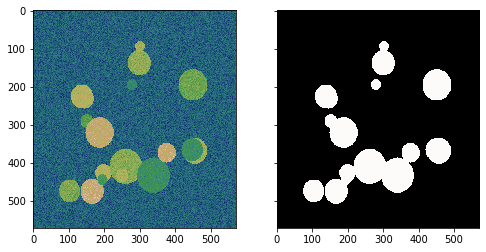

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

W0817 13:59:24.861921 140635527452480 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:189: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0817 13:59:24.863252 140635527452480 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:194: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 13:59:24.891227 140635527452480 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/layers.py:25: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0817 13:59:24.919054 140635527452480 deprecation.py:506] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/layers.py:39: calling 

In [20]:
import tensorflow as tf

total_parameters = 0
for variable in tf.trainable_variables():
    shape = variable.get_shape()
    variable_parameters = 1
    for dim in shape:
        variable_parameters *= dim.value
    total_parameters += variable_parameters
print("This model has %d trainable parameters"% (total_parameters))


This model has 116813 trainable parameters


In [16]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [17]:
path = trainer.train(generator, "./unet_trained", training_iters=32, epochs=10, display_step=2)

W0817 14:09:12.031499 140635527452480 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:346: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



In [18]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

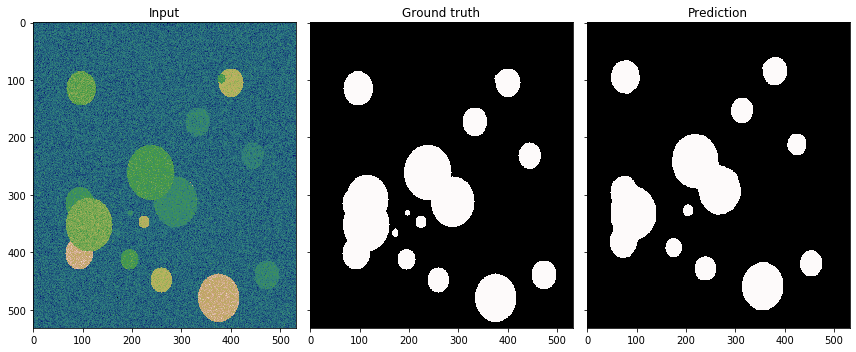

In [19]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")